In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('logs.csv',sep=',',skiprows=0)
df

,date,user,page,duration
0,2021-01-01,17789,about,9
1,2021-01-01,17789,search,27
2,2021-01-01,17789,search,9
3,2021-01-01,17789,about,41
4,2021-01-01,17789,search,12
...,...,...,...,...
26963,2021-03-01,20762,search,25
26964,2021-03-01,20762,profile,27
26965,2021-03-01,20762,listings,66
26966,2021-03-01,20762,about,18


In [14]:
uniqueUsers = df['user'].nunique()
print("Unique users: " + str(uniqueUsers))

Unique users: 2974


In [16]:
byPage = df.groupby(['page'])['duration'].sum()
byUserPage = df.groupby(['user','page']).sum()
byPage


page
about       116438
home        113527
listings    336736
profile     169051
search      394931
Name: duration, dtype: int64

In [19]:
meanDurations = df.groupby(['page'])['duration'].mean() # people spent about the same time on average on each page
meanDurations

page
about       42.325700
home        42.376633
listings    41.908650
profile     41.322659
search      41.960370
Name: duration, dtype: float64

In [22]:
medianDurations = df.groupby(['page'])['duration'].median()
medianDurations

page
about       37
home        38
listings    37
profile     37
search      37
Name: duration, dtype: int64

<AxesSubplot:title={'center':'duration'}, xlabel='page'>

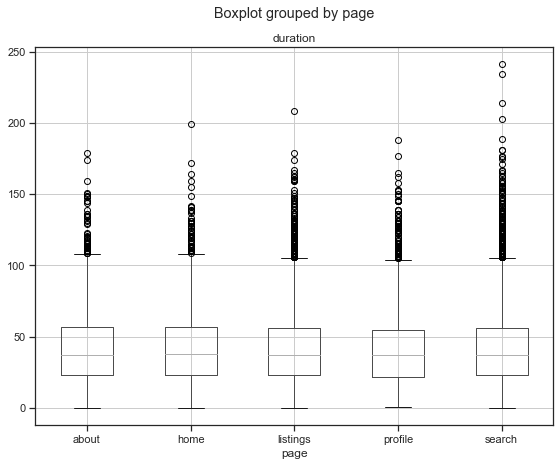

In [27]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_style("ticks")
df.boxplot(column='duration',by='page')
# data is quite skewed, has a lot of larger outliers